In [ ]:
#uusigb a box- cox trnasformer


In [54]:
import pandas as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  accuracy_score

In [19]:
df=sns.load_dataset('tips')
sam=df.drop(columns=['sex','smoker','day','time'])

In [103]:
sam.sample(5)

,total_bill,tip,size
163,13.81,2.00,2
228,13.28,2.72,2
154,19.77,2.00,4
119,24.08,2.92,4
36,16.31,2.00,3


In [24]:
sam.isnull().sum()

,0
total_bill,0
tip,0
size,0


In [21]:
fea=sam.drop(columns=['tip'])
tar=sam['tip']

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(fea,tar,test_size=0.3)

In [97]:
model=LinearRegression()
model.fit(xtrain,ytrain)
prediction=model.predict(xtest)

print("your prediction is",prediction)

accuracy=model.score(xtest,ytest)\

print('/n/n your accuracy before power transformer is',accuracy)



your prediction is [2.45520979 2.57559605 2.60151254 2.25874611 2.33733158 2.5889723
 3.2444086  4.80833942 2.31308713 1.69610755 3.42331596 5.61856589
 2.26119052 3.01952038 2.82382908 2.33733158 2.81546892 2.97186749
 3.46093667 2.74029114 2.92839467 5.1821657  4.25496067 2.4075569
 2.16678438 2.77366814 3.11887898 2.2211254  3.11817023 2.11578742
 4.81599083 2.67591794 4.11958976 5.64454601 5.18808144 2.73270337
 2.30221892 2.32562736 3.63052058 3.09559781 2.81051646 1.92768389
 3.32884619 5.1002998  2.18434071 2.52710714 2.87238162 3.82370384
 2.75193173 3.15321926 2.23199361 1.87591456 3.54614663 3.19508368
 2.07983875 3.78357509 2.20774915 2.39836073 2.32479135 2.3916726
 3.71495817 2.98440772 2.26035451 2.01797359 2.2637622  4.22910782
 2.30221892 4.87367591 3.66814129 2.2687783  2.57977613 2.71103059
 2.14922805 4.7557977 ]
/n/n your accuracy before power transformer is 0.49682553587700684


Text(0.5, 1.0, 'size')

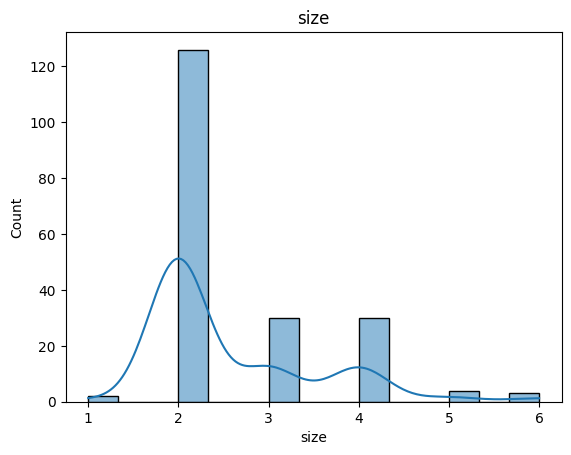

In [57]:
#befoere transformation graphs
sns.histplot(xtrain['size'],kde=True)
plt.title('size befor etranformation')

((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

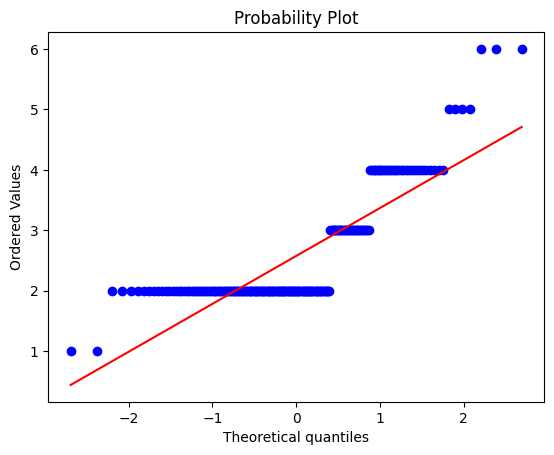

In [60]:
stats.probplot(xtrain['size'],plot=plt)

Text(0.5, 1.0, 'bill befor etranformation')

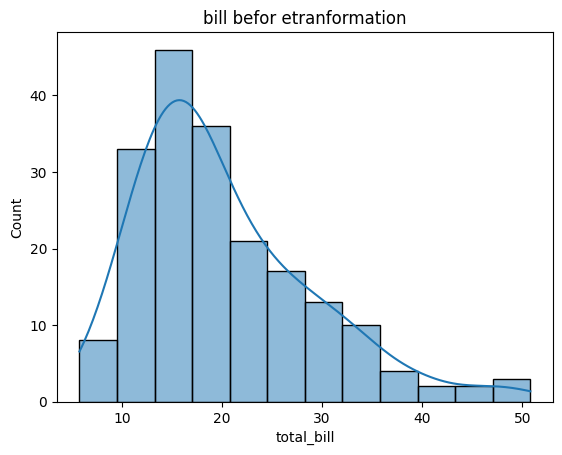

In [59]:
sns.histplot(xtrain['total_bill'],kde=True)
plt.title('bill befor etranformation')

((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

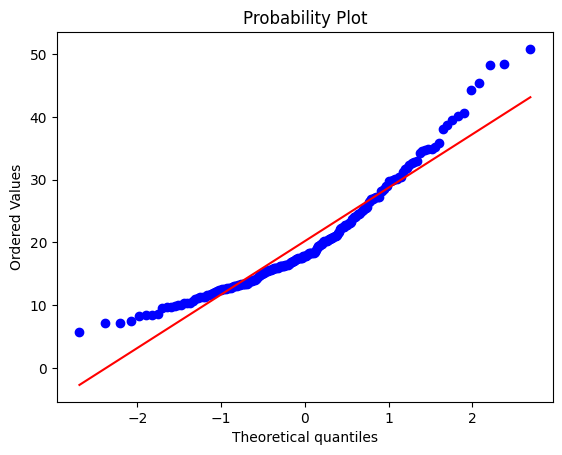

In [61]:
stats.probplot(xtrain['total_bill'],plot=plt)

In [99]:

ct=ColumnTransformer(
    transformers=[
    ('t1',PowerTransformer(method='box-cox'),['size','total_bill'])
    ],remainder='passthrough')

In [100]:
xtrain_transformmed=ct.fit_transform(xtrain)
xtest_transformmed=ct.transform(xtest)

In [101]:
model1=LinearRegression()
model1.fit(xtrain_transformmed,ytrain)

prediction=model1.predict(xtest)

print("your prediction is",prediction)

accuracy=model1.score(xtest,ytest)\

print('/n/n your accuracy before power transformer is',accuracy)




your prediction is [ 6.65295202  6.87707652  6.92532555  6.28719329  6.43349678  6.90197925
  8.12221263 12.47980512  6.3883606   5.23972254  8.45528654 13.26521103
  6.65324515  7.70353562  7.70071591  6.43349678  7.6851517   7.61481967
  8.52532545  7.18369129  7.53388582 12.45275972 11.08807239  6.56423607
  6.11598707  7.6073307   8.61151482  6.21715438  7.88719319  6.02104545
 11.7710477   7.06384694 10.47454972 12.95207746 12.10227206  7.53106611
  6.36812714  6.4117069   9.56404394  7.84516985  7.31443058  5.67085091
  8.27941107 11.93884795  6.1486719   6.78680415  7.42960567  9.56219439
  7.56686377  8.31394544  6.23738785  5.21297026  9.04546291  8.03038385
  5.95411938  9.48748623  6.19225166  6.54711545  6.41015048  6.53466409
  9.72124238  7.63816597  6.65168873  5.83894429  6.29653181 10.67844076
  6.36812714 11.87844069  9.63408285  6.30587033  6.88485862  7.12921659
  6.08330225 11.65898545]
/n/n your accuracy before power transformer is -7.96042070153705


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [87]:

ps.DataFrame(xtrain_transformmed)

,0,1
0,-0.583076,-0.794208
1,-0.583076,0.653380
2,-0.583076,0.928983
3,1.485561,1.281322
4,-0.583076,-0.345183
...,...,...
190,-0.583076,0.251375
191,-0.583076,-0.525875
192,-0.583076,-2.878318
193,-0.583076,1.486337


Text(0.5, 1.0, 'size after etranformation')

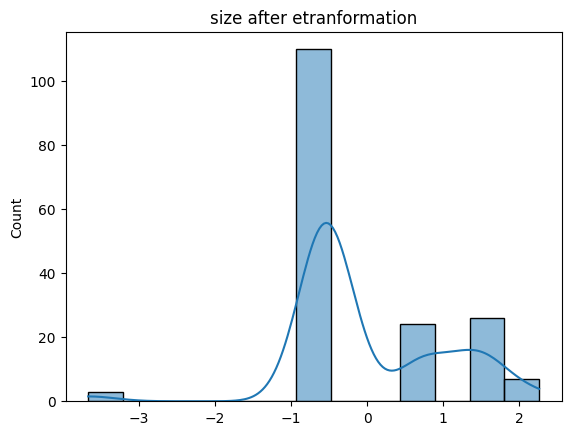

In [104]:
#befoere transformation graphs
sns.histplot(xtrain_transformmed[:,0],kde=True)
plt.title('size after etranformation')

((array([-2.64628713, -2.33103129, -2.15080987, -2.0214741 , -1.91911161,
         -1.83362478, -1.75975585, -1.69440309, -1.63557669, -1.58192053,
         -1.53246709, -1.48650077, -1.44347676, -1.40297023, -1.36464321,
         -1.32822219, -1.29348255, -1.26023745, -1.22832972, -1.19762582,
         -1.16801127, -1.13938714, -1.11166731, -1.08477636, -1.05864777,
         -1.03322264, -1.00844845, -0.98427825, -0.9606698 , -0.937585  ,
         -0.91498935, -0.89285146, -0.87114273, -0.84983698, -0.8289102 ,
         -0.80834027, -0.78810682, -0.76819099, -0.74857529, -0.7292435 ,
         -0.71018047, -0.69137211, -0.6728052 , -0.65446739, -0.63634707,
         -0.61843333, -0.60071589, -0.58318505, -0.56583164, -0.54864699,
         -0.53162285, -0.51475142, -0.49802527, -0.4814373 , -0.46498076,
         -0.4486492 , -0.43243644, -0.41633657, -0.4003439 , -0.38445298,
         -0.36865856, -0.35295558, -0.33733916, -0.32180459, -0.30634729,
         -0.29096284, -0.27564696, -0.

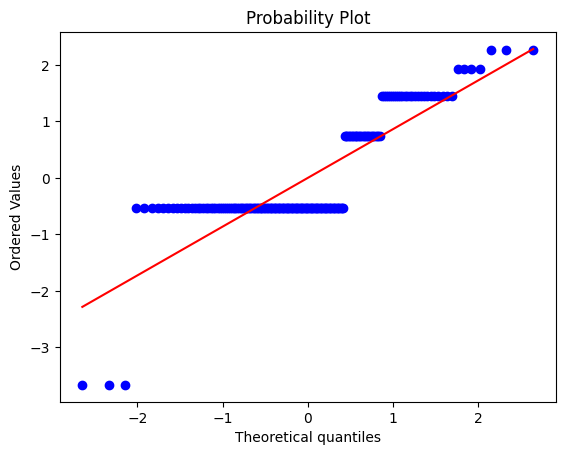

In [107]:
stats.probplot(xtrain_transformmed[:,0],plot=plt)